In [1]:
%autosave 15
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import numpy as np
import scipy as sp
from scipy import stats as sps
import scipy.optimize as spo

import math
from collections import namedtuple
from functools import partial

Autosaving every 15 seconds


In [2]:
data = pd.read_csv('non-parametric.csv', sep=';', names=['id', 'x', 'y'])

#1st parameter is text
ids = data['id'].values[1:].astype('int')
X = data['x'].values[1:].astype('float32')
Y = data['y'].values[1:].astype('float32')
n = len(data) - 1
print('dataset size:', n)

dataset size: 136


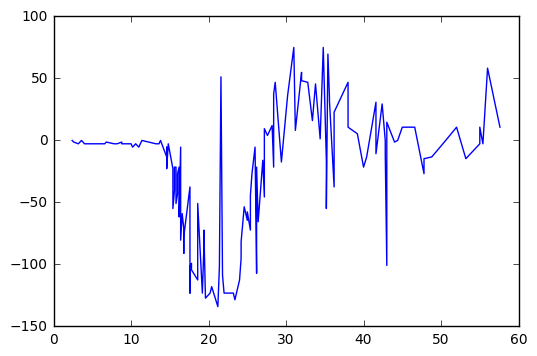

In [3]:
plt.plot(X, Y)

In [4]:
class SmoothingMethodRegression():
    
    def __init__(self, kernel, k):
        self.kernel = kernel
        self.k = k
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        
    def predict(x):
        sum1 = 0
        sum2 = 0
        dist = [(np.abs(self.x[i] - x), i) for i in len(self.x)]
        dist.sort()
        for i in range(self.k):
            elem = dist[i]
            value = self.kernel(elem[0] / dist[self.k][0])
            sum1 += self.y[elem[1]] * value
            sum2 += value
        return sum1 / sum2

In [5]:
def gaussKernel(x):
    return np.exp(- (x ** 2) / 2)

def quadKernel(x):
    return (1 - x ** 2) ** 2

In [6]:
def computeScore(model, x, y):
    acc = 0
    for i in range(len(x)):
        xx = x[i]
        print(x[i])
        acc += (model.predict(xx) - y[i]) ** 2
    return acc / len(x)

In [7]:
for kernel in [gaussKernel, quadKernel]:
    for k in range(3, 16):
        model = SmoothingMethodRegression(kernel, k)
        model.fit(X, Y)
        MSE = computeScore(model, X, Y)
        print(MSE)
        

2.4


TypeError: predict() takes 1 positional argument but 2 were given